In [8]:
import cv2
import pandas as pd
import numpy as np
import marimo
from matplotlib import pyplot as plt

Hier eine detaillierte Erklärung der einzelnen Filter, was sie bewirken und welche Parameter in der **OpenCV-Implementierung** relevant sind:

---

### **1. Sobel Filter**
Der Sobel Filter ist ein Gradient-basierter Filter, der zur **Kantenextraktion** verwendet wird.

- **Funktion**: 
  - Der Sobel-Filter hebt Änderungen in der Intensität hervor und zeigt, wo Kanten im Bild liegen.
  - Es gibt zwei Varianten:
    - **Sobel X**: Findet vertikale Kanten (Änderungen in horizontaler Richtung).
    - **Sobel Y**: Findet horizontale Kanten (Änderungen in vertikaler Richtung).

- **Wichtige Parameter**:
  - **`cv2.CV_64F`**: Datenformat für die Ausgabe. Hier wird ein 64-Bit-Float verwendet, um negative Werte zuzulassen (Kanten haben positive und negative Intensitäten).
  - **`dx` und `dy`**: Geben die Richtung des Gradienten an:
    - `dx=1, dy=0` für Sobel X.
    - `dx=0, dy=1` für Sobel Y.
  - **`ksize`**: Größe des Filters (Kernelgröße, z. B. \( 3 \times 3 \)). Größere Werte führen zu glatteren Ergebnissen, können aber kleinere Details verlieren.

---

### **2. Gaussian Filter**
Der Gaussian Filter ist ein **Low-Pass-Filter**, der verwendet wird, um das Bild zu **glätten** und Rauschen zu reduzieren.

- **Funktion**:
  - Glättet das Bild durch Anwendung eines gewichteten Mittelwerts, wobei Pixel näher am Zentrum des Filters stärker gewichtet werden.
  - Verwendet eine Gaußsche Verteilung, um den Filterkernel zu berechnen.

- **Wichtige Parameter**:
  - **`(5, 5)`**: Kernelgröße. Hier ein 5x5-Kernel. Größere Kernel führen zu stärkerem Glätten.
  - **`sigmaX`**: Die Standardabweichung der Gaußschen Verteilung in horizontaler Richtung. Größere Werte führen zu stärkerem Glätten.
  - (Optional: **`sigmaY`**) – Falls nicht angegeben, wird `sigmaX` auch für die vertikale Richtung verwendet.

---

### **3. Box Filter**
Der Box Filter ist ein **Mean Filter**, der den Durchschnitt der Pixelwerte in einem bestimmten Bereich berechnet.

- **Funktion**:
  - Glättet das Bild durch Berechnung eines einfachen Durchschnitts aller Pixelwerte im Filterkernel.
  - Im Gegensatz zum Gaussian Filter sind alle Pixel im Kernel gleich stark gewichtet.

- **Wichtige Parameter**:
  - **`-1`**: Tiefenwert des Bilds (z. B. Original-Tiefe des Eingabebildes).
  - **`(5, 5)`**: Kernelgröße. Hier ein 5x5-Kernel. Größere Kernel führen zu stärkerem Glätten.

---

### **4. Laplacian Filter**
Der Laplacian Filter basiert auf der zweiten Ableitung eines Bildes und dient zur **Erkennung von Kanten und Übergängen**.

- **Funktion**:
  - Hebt Bereiche hervor, in denen die Intensität sich schnell ändert, was oft an Kanten oder Übergängen geschieht.
  - Kann Kanten in alle Richtungen finden (im Gegensatz zu Sobel, der nur in X- oder Y-Richtung arbeitet).

- **Wichtige Parameter**:
  - **`cv2.CV_64F`**: Datenformat für die Ausgabe. Da die zweite Ableitung auch negative Werte liefern kann, wird ein 64-Bit-Float verwendet.

---

### **Zusammenfassung der Effekte:**

| **Filter**      | **Effekt**                              | **Verwendung**                                           |
|------------------|-----------------------------------------|---------------------------------------------------------|
| **Sobel X/Y**    | Kanten in X- oder Y-Richtung finden     | Kantenextraktion, Gradientenberechnung                 |
| **Gaussian**     | Glättung durch gewichteten Mittelwert   | Rauschreduktion, Vorbereitung für Downsampling         |
| **Box**          | Gleichmäßige Glättung                  | Rauschreduktion, weniger detailliert als Gaussian      |
| **Laplacian**    | Hervorhebung von Kanten (alle Richtungen) | Kantenextraktion, Übergangserkennung                   |

---

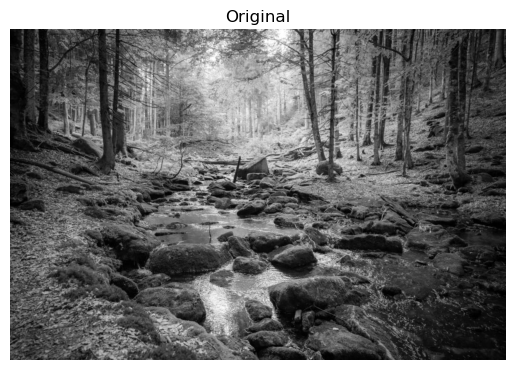

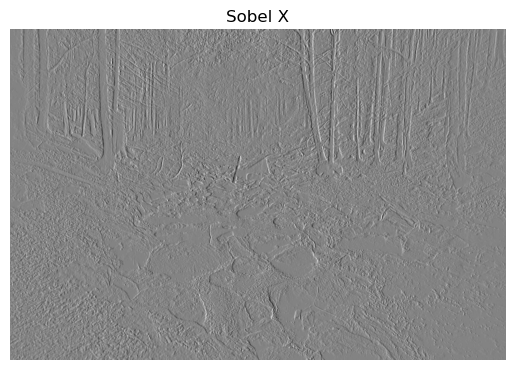

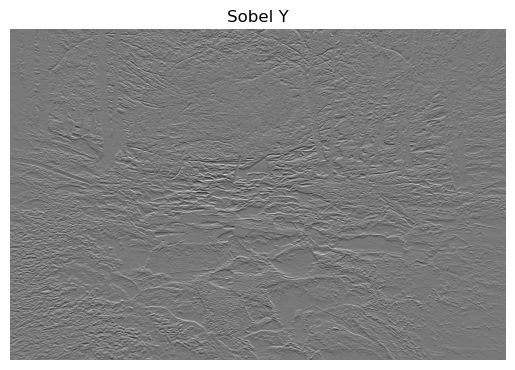

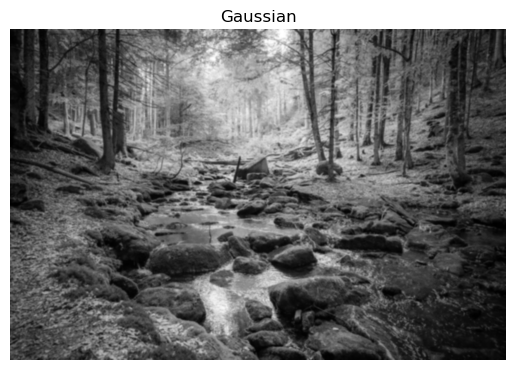

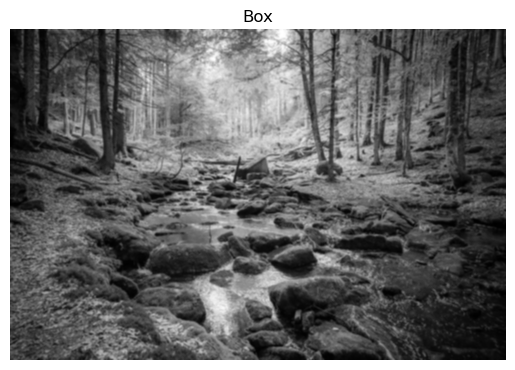

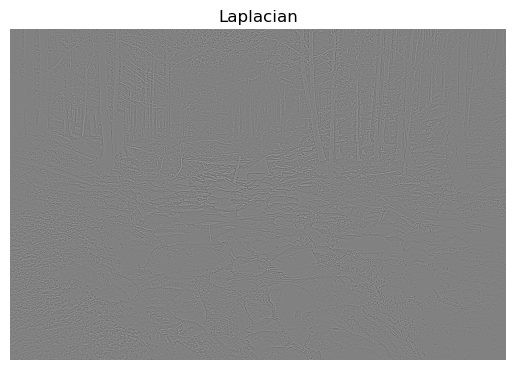

In [9]:

# Bild laden (Graustufen)
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel Filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Gaussian Filter
gaussian = cv2.GaussianBlur(image, (5, 5), sigmaX=1.5)

# Box Filter
box = cv2.boxFilter(image, -1, (5, 5))

# Laplacian Filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Ergebnisse anzeigen
filters = {'Original': image, 'Sobel X': sobel_x, 'Sobel Y': sobel_y, 'Gaussian': gaussian, 'Box': box, 'Laplacian': laplacian}

for name, img in filters.items():
    plt.figure()
    plt.title(name)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


### **Welche Filter sind separable?**

- **Gaussian Filter**: Separable, da die Gaußfunktion in \( x \)- und \( y \)-Richtung unabhängig ist:
  \[
  G(x, y) = G_x(x) \cdot G_y(y)
  \]

- **Box Filter**: Separable, da alle Werte im Kernel gleich sind:
  \[
  B(x, y) = \frac{1}{n} \cdot \frac{1}{n}
  \]

- **Sobel Filter**: Separable, da es aus einer Differenz und einer Glättung besteht:
  - Sobel X: \(\begin{bmatrix} -1 & 0 & 1 \end{bmatrix}\) und \(\begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}\)
  - Sobel Y: \(\begin{bmatrix} 1 & 2 & 1 \end{bmatrix}\) und \(\begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix}\)

- **Laplacian Filter**: Nicht separable, da es keine Produktdarstellung erlaubt.

---

### **Zusammenfassung**
- **Separable Kernels** ermöglichen eine effizientere und speicherschonendere Filterung.
- **Gaussian**, **Box**, und **Sobel** Filter sind separable und können in zwei 1D-Faltungen zerlegt werden.
- **Laplacian** ist nicht separable und muss als vollständiger 2D-Kernel angewandt werden.
- Eine Implementation mit separable Kernels ist nicht nur schneller, sondern zeigt auch ein tieferes Verständnis für die mathematischen Eigenschaften der Filter. 😊

In [3]:
def convolve(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_h, pad_w = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            filtered_image[i, j] = np.sum(region * kernel)
    
    return filtered_image

# Sobel-Kerne
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Sobel Filter anwenden
sobel_x = convolve(image, sobel_x_kernel)
sobel_y = convolve(image, sobel_y_kernel)


In [4]:
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    gauss = np.exp(-0.5 * (ax / sigma) ** 2)
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

gaussian_kernel_5x5 = gaussian_kernel(5, 1.5)
gaussian = convolve(image, gaussian_kernel_5x5)


In [5]:
box_kernel = np.ones((5, 5)) / 25
box = convolve(image, box_kernel)

In [6]:
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian = convolve(image, laplacian_kernel)
